In [4]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from google.cloud import bigquery
import pymysql

client = bigquery.Client()
conn = pymysql.connect(
    host='mysql-data.mysql.database.azure.com',
    port=int(3306),
    user='python',
    passwd='Science123$',
    db='divy')

InternalError: (9002, 'The connection string may not be right. Please visit portal for references.\x00')

In [3]:
fileNames=['Divvy_Trips_2016_04.csv',
           'Divvy_Trips_2016_05.csv',
           'Divvy_Trips_2016_06.csv',
           'Divvy_Trips_2016_Q3.csv',
           'Divvy_Trips_2016_Q4.csv']

In [10]:
divy_df=pd.read_csv('DataSets/Divvy_Trips_2016_Q1.csv')

for fileName in fileNames:
    df=pd.read_csv(f'DataSets/{fileName}')
    divy_df=divy_df.append(df,ignore_index=True)
    



396913
628548
991867
1469740
2911551
3595383


In [11]:
divy_df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080551,3/31/2016 23:53,4/1/2016 0:07,155,841,344,Ravenswood Ave & Lawrence Ave,458,Broadway & Thorndale Ave,Subscriber,Male,1986.0
1,9080550,3/31/2016 23:46,3/31/2016 23:57,4831,649,128,Damen Ave & Chicago Ave,213,Leavitt St & North Ave,Subscriber,Male,1980.0
2,9080549,3/31/2016 23:42,3/31/2016 23:46,4232,210,350,Ashland Ave & Chicago Ave,210,Ashland Ave & Division St,Subscriber,Male,1979.0
3,9080548,3/31/2016 23:37,3/31/2016 23:55,3464,1045,303,Broadway & Cornelia Ave,458,Broadway & Thorndale Ave,Subscriber,Male,1980.0
4,9080547,3/31/2016 23:33,3/31/2016 23:37,1750,202,334,Lake Shore Dr & Belmont Ave,329,Lake Shore Dr & Diversey Pkwy,Subscriber,Male,1969.0


In [14]:
divy_df['date']=pd.to_datetime(pd.DatetimeIndex(divy_df['starttime']).normalize())

In [15]:
divy_df['date']

0         2016-03-31
1         2016-03-31
2         2016-03-31
3         2016-03-31
4         2016-03-31
5         2016-03-31
6         2016-03-31
7         2016-03-31
8         2016-03-31
9         2016-03-31
10        2016-03-31
11        2016-03-31
12        2016-03-31
13        2016-03-31
14        2016-03-31
15        2016-03-31
16        2016-03-31
17        2016-03-31
18        2016-03-31
19        2016-03-31
20        2016-03-31
21        2016-03-31
22        2016-03-31
23        2016-03-31
24        2016-03-31
25        2016-03-31
26        2016-03-31
27        2016-03-31
28        2016-03-31
29        2016-03-31
             ...    
3595353   2016-10-01
3595354   2016-10-01
3595355   2016-10-01
3595356   2016-10-01
3595357   2016-10-01
3595358   2016-10-01
3595359   2016-10-01
3595360   2016-10-01
3595361   2016-10-01
3595362   2016-10-01
3595363   2016-10-01
3595364   2016-10-01
3595365   2016-10-01
3595366   2016-10-01
3595367   2016-10-01
3595368   2016-10-01
3595369   201

In [21]:
daily_ride_groupby = divy_df.groupby('date').count()

In [23]:
daily_ride_groupby=daily_ride_groupby.reset_index()

In [24]:
daily_ride_groupby

,date,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2016-01-01,935,935,935,935,935,935,935,935,935,935,851,851
1,2016-01-02,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1300,1300
2,2016-01-03,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399,1289,1289
3,2016-01-04,3833,3833,3833,3833,3833,3833,3833,3833,3833,3833,3772,3772
4,2016-01-05,4189,4189,4189,4189,4189,4189,4189,4189,4189,4189,4100,4100
5,2016-01-06,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4511,4511
6,2016-01-07,5028,5028,5028,5028,5028,5028,5028,5028,5028,5028,4918,4919
7,2016-01-08,3425,3425,3425,3425,3425,3425,3425,3425,3425,3425,3341,3341
8,2016-01-09,1733,1733,1733,1733,1733,1733,1733,1733,1733,1733,1662,1662
9,2016-01-10,993,993,993,993,993,993,993,993,993,993,974,974


In [27]:
daily_rides_df= daily_ride_groupby[['date','trip_id']]

In [49]:
daily_rides_df.rename(columns={"trip_id":"ride_count"})

,date,ride_count
0,2016-01-01 00:00:00+00:00,935
1,2016-01-02 00:00:00+00:00,1421
2,2016-01-03 00:00:00+00:00,1399
3,2016-01-04 00:00:00+00:00,3833
4,2016-01-05 00:00:00+00:00,4189
5,2016-01-06 00:00:00+00:00,4608
6,2016-01-07 00:00:00+00:00,5028
7,2016-01-08 00:00:00+00:00,3425
8,2016-01-09 00:00:00+00:00,1733
9,2016-01-10 00:00:00+00:00,993


In [50]:
 daily_rides_df['date']=pd.DatetimeIndex(pd.to_datetime(daily_rides_df['date'],unit='ms')).tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [51]:
daily_rides_df.head()

,date,trip_id
0,2016-01-01 00:00:00+00:00,935
1,2016-01-02 00:00:00+00:00,1421
2,2016-01-03 00:00:00+00:00,1399
3,2016-01-04 00:00:00+00:00,3833
4,2016-01-05 00:00:00+00:00,4189


In [30]:
sql="""SELECT
    TIMESTAMP_TRUNC(TIMESTAMP(CONCAT(year, '-', mo, '-', da)),
      DAY) AS date,
    year,
    PERCENT_RANK() OVER (PARTITION BY year ORDER BY AVG(temp)) AS rank,
    AVG(temp) AS temperature
  FROM
    `bigquery-public-data.noaa_gsod.gsod*` AS w
  JOIN
    `bigquery-public-data.noaa_gsod.stations` AS s
  ON
    w.stn = s.usaf
    AND s.name = "CHICAGO O'HARE INTERNATIONAL"
  WHERE
    w._TABLE_SUFFIX = '2016'
    
  GROUP BY
    date,
    year"""
weather_df = client.query(sql).to_dataframe()
weather_df.head()


,date,year,rank,temperature
0,2016-12-19 00:00:00+00:00,2016,0.000000,-0.6
1,2016-01-18 00:00:00+00:00,2016,0.002740,0.6
2,2016-12-15 00:00:00+00:00,2016,0.005479,3.9
3,2016-01-11 00:00:00+00:00,2016,0.008219,5.1
4,2016-01-19 00:00:00+00:00,2016,0.010959,5.8


In [44]:
weather_df['date']=pd.to_datetime(weather_df['date'])


In [43]:
weather_df.head()

,date,year,rank,temperature
0,2016-12-19 00:00:00+00:00,2016,0.000000,-0.6
1,2016-01-18 00:00:00+00:00,2016,0.002740,0.6
2,2016-12-15 00:00:00+00:00,2016,0.005479,3.9
3,2016-01-11 00:00:00+00:00,2016,0.008219,5.1
4,2016-01-19 00:00:00+00:00,2016,0.010959,5.8


In [48]:
merged_data = pd.merge(daily_rides_df, weather_df, left_on='date', right_on='date')
merged_data

,date,trip_id,year,rank,temperature
0,2016-01-01 00:00:00+00:00,935,2016,0.076712,23.4
1,2016-01-02 00:00:00+00:00,1421,2016,0.104110,27.0
2,2016-01-03 00:00:00+00:00,1399,2016,0.098630,26.8
3,2016-01-04 00:00:00+00:00,3833,2016,0.101370,26.9
4,2016-01-05 00:00:00+00:00,4189,2016,0.084932,25.5
5,2016-01-06 00:00:00+00:00,4608,2016,0.120548,28.3
6,2016-01-07 00:00:00+00:00,5028,2016,0.235616,36.0
7,2016-01-08 00:00:00+00:00,3425,2016,0.282192,38.5
8,2016-01-09 00:00:00+00:00,1733,2016,0.249315,37.1
9,2016-01-10 00:00:00+00:00,993,2016,0.046575,19.0


Text(0.5,0,'Temperature')

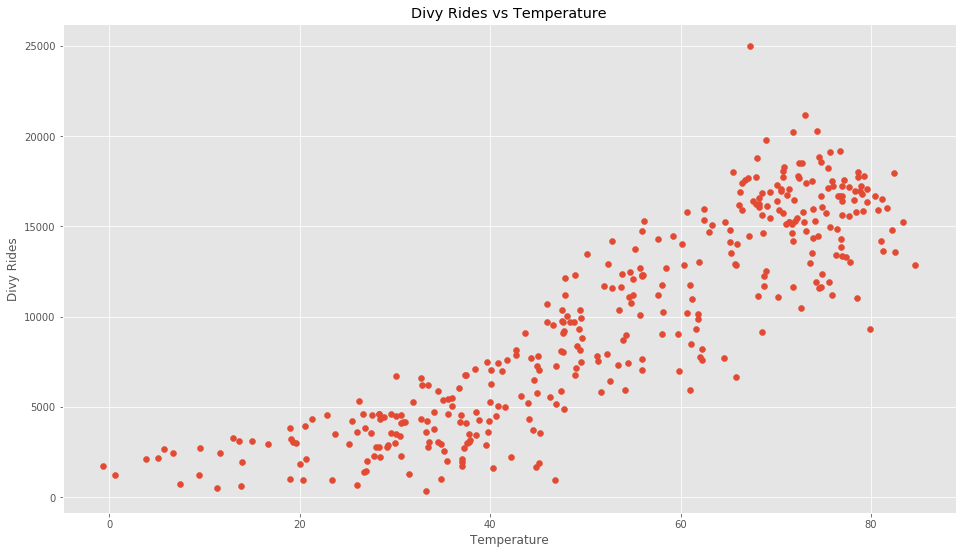

In [52]:
fig = plt.figure(figsize=(16,9))
plt.scatter(merged_data['temperature'],merged_data['trip_id'])
plt.title('Divy Rides vs Temperature')
plt.ylabel("Divy Rides")
plt.xlabel("Temperature")